# Lecture 26 practice

This notebook is built to help you practice using least-squares optimization both approximately on your own and also using an optimizer result to perform model fitting. We'll focus on models that are either straight lines or can linearized using a transformation.

## Import needed packages

These statements only need to be run once at the beginning of the notebook

In [1]:
from linear_fitting_functions import *

## Example 1

Consider the model

$$ y = C \left( x^2 + 2 \right)^a $$

Let's make a linearizing transformation for this model

$$ \ln y = \ln C + a\ln(x^2 + 2) $$

That means our $y^* = \ln y$, $C^* = \ln C$, and $x^* = \ln(x^2 + 2)$ so that

$$ y^* = ax^* + C^* $$

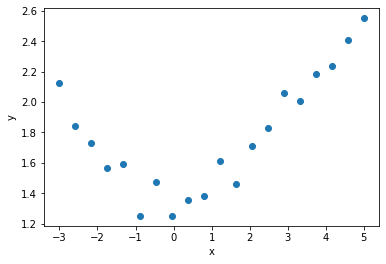

In [2]:
C_use = 1.1
a_use = 0.25
np.random.seed(1) # this makes sure the random values are the same every time you run the notebook
# set up evenly spaced x values
n_test_1 = 20
xvals_test_1 = np.linspace(-3,5,num=n_test_1)
yvals_test_1 = [C_use * (x**2.0 + 2.)**a_use + 0.075*np.random.normal() for x in xvals_test_1]

# plot the test data
plt.plot(xvals_test_1, yvals_test_1, 'o');
plt.xlabel('x');
plt.ylabel('y');

### Linearize the data and plot in the linearized variables

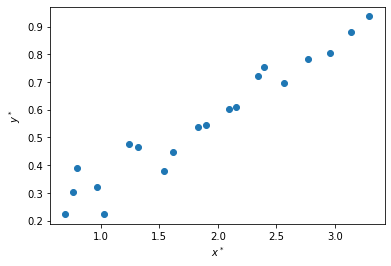

In [3]:
ystarvals_1 = np.empty(n_test_1)
xstarvals_1 = np.empty(n_test_1)
for i in range(0,n_test_1):
    ystarvals_1[i] = np.log(yvals_test_1[i])
    xstarvals_1[i] = np.log(xvals_test_1[i]**2.0 + 2)    
    
# plot the test data
plt.plot(xstarvals_1, ystarvals_1, 'o');
plt.xlabel('$x^*$');
plt.ylabel('$y^*$');

### Set up an array of $x^*$ values to predict the model at

In [4]:
npred_1 = 50
# make this range a bit larger than where we have data
xstarpred_1 = np.linspace(0.25,4,num=npred_1)

### Use the `least_squares_fit_linear` function to get a slope and intercept

             x value     residual squared
              2.3979               0.0036
              2.1577               0.0004
              1.8956               0.0003
              1.6128               0.0017
              1.3168               0.0029
              1.0298               0.0131
              0.7995               0.0122
              0.6945               0.0007
              0.7588               0.0013
              0.9644               0.0000
              1.2428               0.0070
              1.5395               0.0082
              1.8267               0.0000
              2.0942               0.0001
              2.3398               0.0019
              2.5645               0.0017
              2.7703               0.0001
              2.9595               0.0011
              3.1340               0.0000
              3.2958               0.0001
The sum of squared deviations is 0.06
And in case you need to know...
The largest absolute error is r = 0.11 
 It occu

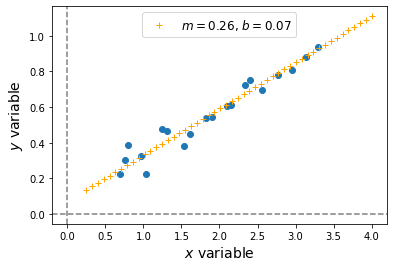

In [5]:
least_squares_fit_linear(xstarvals_1, ystarvals_1, 0.26, 0.07, xstarpred_1, display_table=True)

### Use the `least_squares_optimizer_fit_linear` starting at your guesses to find the optimal solution

After 3 iterations...
The optimization was successful! Here are the values it found:
       m =     0.2527
       b =     0.0829
             x value     residual squared
              2.3979               0.0042
              2.1577               0.0003
              1.8956               0.0002
              1.6128               0.0018
              1.3168               0.0025
              1.0298               0.0143
              0.7995               0.0106
              0.6945               0.0012
              0.7588               0.0008
              0.9644               0.0000
              1.2428               0.0063
              1.5395               0.0085
              1.8267               0.0000
              2.0942               0.0001
              2.3398               0.0023
              2.5645               0.0012
              2.7703               0.0000
              2.9595               0.0006
              3.1340               0.0000
              3.2958           

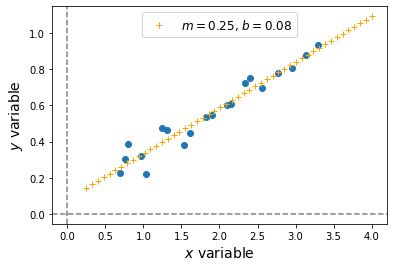

In [6]:
least_squares_optimizer_fit_linear(xstarvals_1, ystarvals_1, 0.26, 0.07, xstarpred_1, display_table=True)

### Return to the original variables and use the optimal slope and intercept you obtained

In [7]:
# make this range a bit larger than where we have data
# need another array in the original x to make new predictions
a_opt_1 = 0.2527 # optimal power is the slope
C_opt_1 = np.exp(0.0829) # optimal constant
print('Using optimal value of a=', '{:.4f}'.format(a_opt_1))
print('Using optimal value of c=', '{:.4f}'.format(C_opt_1))
xpred_1 = np.linspace(-4,6,num=npred_1)
ypred_1 = np.empty(npred_1)
for i in range(0, npred_1):
    ypred_1[i] = C_opt_1 * (xpred_1[i]**2.0 + 2.0)**a_opt_1

Using optimal value of a= 0.2527
Using optimal value of c= 1.0864


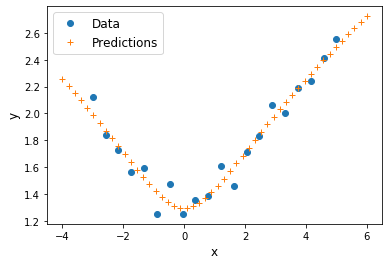

In [8]:
plt.plot(xvals_test_1, yvals_test_1, 'o', label='Data');
plt.plot(xpred_1, ypred_1, '+', label='Predictions');
plt.xlabel('x', fontsize=12);
plt.ylabel('y', fontsize=12);
plt.legend(fontsize=12);

Hey, not bad at all! The true values used to generate the test data were $C=1.1$ and $a=0.25$.

## Lab quiz

Based on what I did above, it's time for you to try a similar example! Consider the proposed model

$$ y = C \left(\cfrac{1}{x^2+1}\right)^a $$

Given the test data below

- linearize the model and then transform the data
- plot the linearized data
- use the `least_squares_fit_linear` to find the best coefficient values possible that minimize the sum of squared deviations
- using the values you obtained in the last part as starting guesses, use the `least_squares_optimizer_fit_linear` to find the best coefficient values possible that minimize the sum of squared deviations
- transform back to the original variables and use your optimal values to make a prediction

Cell that generates the test data. Note that $C=5$ and $a=0.33$

[5.02773162852465, 4.204043528835038, 3.6172091181808743, 2.752887278160854, 2.3832702105734125, 2.2404799319806985, 1.7738838350483745, 1.6362877373906237, 1.5782170943986076, 1.414574865448969, 1.2343858108640993, 1.2530863376904555, 1.1684496119691024, 1.2041243773608143, 0.9238159726608044]


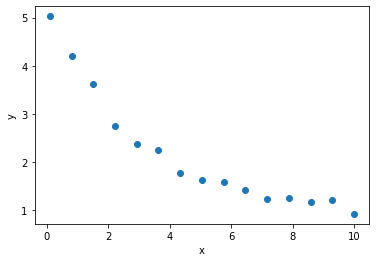

In [9]:
C_use_2 = 5.0
a_use_2 = 0.33
np.random.seed(5) # this makes sure the random values are the same every time you run the notebook
# set up evenly spaced x values
n_test_2 = 15
xvals_test_2 = np.linspace(0.1,10,num=n_test_2)
yvals_test_2 = [C_use_2 * (1/(x**2.0 + 1.))**a_use_2 + 0.1*np.random.normal() for x in xvals_test_2]

# plot the test data
plt.plot(xvals_test_2, yvals_test_2, 'o');
plt.xlabel('x');
plt.ylabel('y');
#print(xvals_test_2.tolist())
print(yvals_test_2)

In [10]:
xvals_test_2 = np.array([ 0.1, 0.80714286, 1.51428571, 2.22142857, 2.92857143, 3.63571429, 
                          4.34285714, 5.05, 5.75714286, 6.46428571, 7.17142857, 7.87857143, 
                          8.58571429, 9.29285714, 10.])
yvals_test_2 = np.array([5.02773162852465, 4.204043528835038, 3.6172091181808743,
                         2.752887278160854, 2.3832702105734125, 2.2404799319806985,
                         1.7738838350483745, 1.6362877373906237, 1.5782170943986076,
                         1.414574865448969, 1.2343858108640993, 1.2530863376904555,
                         1.1684496119691024, 1.2041243773608143, 0.9238159726608044])
n_test_2 = len(yvals_test_2)

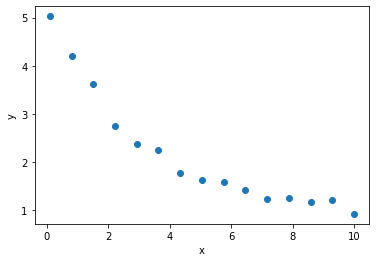

In [11]:
plt.plot(xvals_test_2, yvals_test_2, 'o');
plt.xlabel('x');
plt.ylabel('y');

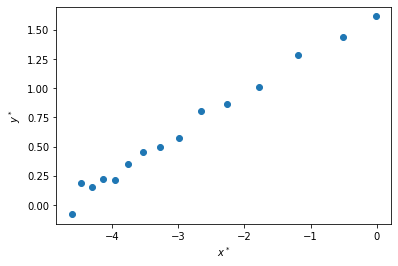

In [12]:
ystarvals_2 = np.empty(n_test_2)
xstarvals_2 = np.empty(n_test_2)
for i in range(0,n_test_2):
    ystarvals_2[i] = np.log(yvals_test_2[i])
    xstarvals_2[i] = np.log(1/(xvals_test_2[i]**2.0 + 1))    
    
# plot the test data
plt.plot(xstarvals_2, ystarvals_2, 'o');
plt.xlabel('$x^*$');
plt.ylabel('$y^*$');

In [13]:
npred_2 = 50
# make this range a bit larger than where we have data
xstarpred_2 = np.linspace(-5,1,num=npred_2)

             x value     residual squared
             -0.0100               0.0000
             -0.5017               0.0002
             -1.1918               0.0061
             -1.7808               0.0001
             -2.2593               0.0012
             -2.6545               0.0123
             -2.9887               0.0000
             -3.2772               0.0002
             -3.5306               0.0045
             -3.7562               0.0013
             -3.9595               0.0008
             -4.1443               0.0026
             -4.3137               0.0016
             -4.4700               0.0157
             -4.6151               0.0079
The sum of squared deviations is 0.05
And in case you need to know...
The largest absolute error is r = 0.13 
 It occurs when x =  -4.4700


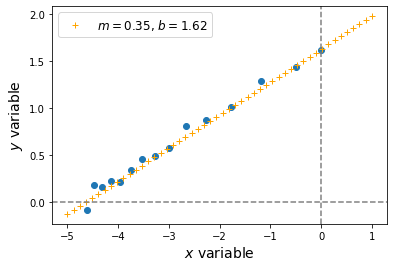

In [24]:
least_squares_fit_linear(xstarvals_2, ystarvals_2, 0.35, 1.625, xstarpred_2, display_table=True)

In [15]:
C_visual_opt = np.exp(1.625)
a_visual_opt = 0.35
print('Using optimal value of a=', '{:.4f}'.format(a_visual_opt))
print('Using optimal value of c=', '{:.4f}'.format(C_visual_opt))

Using optimal value of a= 0.3500
Using optimal value of c= 5.0784


After 2 iterations...
The optimization was successful! Here are the values it found:
       m =     0.3476
       b =     1.6465
             x value     residual squared
             -0.0100               0.0008
             -0.5017               0.0013
             -1.1918               0.0029
             -1.7808               0.0002
             -2.2593               0.0001
             -2.6545               0.0069
             -2.9887               0.0012
             -3.2772               0.0002
             -3.5306               0.0014
             -3.7562               0.0000
             -3.9595               0.0035
             -4.1443               0.0004
             -4.3137               0.0001
             -4.4700               0.0087
             -4.6151               0.0147
The sum of squared deviations is 0.0423
And in case you need to know...
The largest absolute error is r = 0.1214 
 It occurs when x =  -4.6151


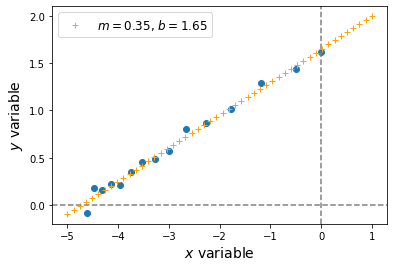

In [16]:
least_squares_optimizer_fit_linear(xstarvals_2, ystarvals_2, 0.35, 1.625, xstarpred_2, display_table=True)

In [25]:
# make this range a bit larger than where we have data
# need another array in the original x to make new predictions
a_opt_2 = 0.3476 # optimal power is the slope
C_opt_2 = np.exp(1.6465) # optimal constant
print('Using optimal value of a=', '{:.4f}'.format(a_opt_2))
print('Using optimal value of c=', '{:.4f}'.format(C_opt_2))
xpred_2 = np.linspace(0,11,num=npred_2)
ypred_2 = np.empty(npred_2)
for i in range(0, npred_2):
    ypred_2[i] = C_opt_2 * (1/(xpred_2[i]**2.0 + 1.0))**a_opt_2

Using optimal value of a= 0.3476
Using optimal value of c= 5.1888


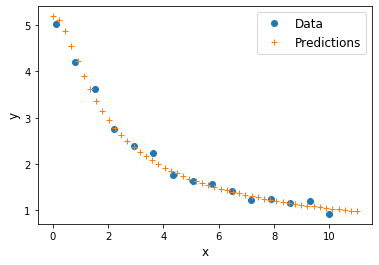

In [18]:
plt.plot(xvals_test_2, yvals_test_2, 'o', label='Data');
plt.plot(xpred_2, ypred_2, '+', label='Predictions');
plt.xlabel('x', fontsize=12);
plt.ylabel('y', fontsize=12);
plt.legend(fontsize=12);

In [19]:
# find dmax
print(np.sqrt(0.0147))
# Find D
print(np.sqrt(0.0423/n_test_2))

0.12124355652982141
0.053103672189407015


For Chebyshev's method, the minimum possible largest absolute deviation one could obtain $c_{\text{max}}$ is bounded above by

$$ d_{\text{max}} = 0.1212 $$

and from below by

$$ D = 0.0531 $$